# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (or  $ \$\$ \quad\$\$ $).

### Criteria (50 points total):
* Task 1 (17 points)

    * Requested formulas are provided - 4 points
    * All necessary experiments are done - 6 points
    * Results are analysed with commentaries - 7 points
* Tasks 2.1 и 2.2 (16 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 2 points
    * Results are analysed with commentaries - 4 points
* Task 3 (13 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 4 points
    * Data was aggregated properly - 2 points
    * Results are analysed with commentaries - 5 points
* Extra points:

    * 4 points in case clear, "pythonic" and understandable code style.

Good work: 40+ points.

In [ ]:
!pip install bds_courseware

In [ ]:
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS

import pandas as pd
import numpy as np
import scipy.stats as st
import math
from sklearn.preprocessing import KBinsDiscretizer

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", palette="Dark2")

from pylab import rcParams

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
# kaggle dataset
!gdown --id 1XxJnDPackacRoJGj1RQA4wm_j1edXg97

Mounted at /content/gdrive/
Downloading...
From: https://drive.google.com/uc?id=1XxJnDPackacRoJGj1RQA4wm_j1edXg97
To: /content/master.csv
2.71MB [00:00, 86.3MB/s]


# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each sampling method plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.   
* Also provide commentaries as summaries and analysis of results after each visualization.


## Formulas

**Random selection from the entire population:**  
  
$$\overline{X_k^s} = \frac{1}{n_k}\sum_{i=1}^{n_k}X_{i}$$
$$\overline{X_s} = \sum_{k=1}^{L} W_k \overline{X_{k}^s}$$
$$ E\overline{X_s} = \sum_{k=1}^{L} W_kE\overline{X_k^s} = \sum_{k=1}^{L}\frac{\mu_k^s}{3}$$
$$D\overline{X_s} = \sum_{k=1}^{L} W_k^2 D\overline{X_{k}} = \sum_{k=1}^{L} W_k^2 \frac{\sigma_k^2}{n_k}=\sum_{k=1}^{L}W_k^2\frac{se_s^2}{n_k}$$

**Random selection of strata in proportion to strata volumes:**  
  
$$\overline{X_k} = \frac{1}{n_k}\sum_{i=1}^{n_k}X_{ik}$$
$$ \mu = \sum_{k=1}^{L} W_k \mu_k => \overline{X_s} = \sum_{k=1}^{L} W_k \overline{X_k}$$
$$ E\overline{X_s} = \sum_{k=1}^{L} W_k E\overline{X_k} = \sum_{k=1}^{L} W_k \mu_k$$
$$D\overline{X_s} = \sum_{k=1}^{L} W_k^2 D\overline{X_{k}} = \sum_{k=1}^{L} W_k^2 \frac{\sigma_k^2}{n_k}$$ 

**Random selection according to the optimal sub-sampling:**  
  
$$\overline{X_k} = \frac{\sum_{k=1}^{L} w_k\sigma_k}{n_sw_k\sigma_k}\sum_{i=1}^{n_k}X_{ik}$$

$$ \mu = \sum_{k=1}^{L} W_k \mu_k => \overline{X_s} = \sum_{k=1}^{L} W_k \overline{X_k}$$

$$ E\overline{X_s} = \sum_{k=1}^{L} W_k E\overline{X_k} = \sum_{k=1}^{L} W_k \mu_k$$

$$D\overline{X_s} = \sum_{k=1}^{L} W_k^2 D\overline{X_{k}} = \sum_{k=1}^{L} W_k^2 \frac{\sigma_k^2}{n_k} = \sum_{k=1}^{L} \frac{W_k \sigma_k \sum_{k=1}^{L}W_k\sigma_k}{n_s}$$

**Sample volumes if they are sampled proportionally:**

$$ n_k = n\times W_k,\ where$$
$$ W_k - strata's\ ratio,\ k = \overline{1L},$$
$$ n = n_1 + . . . + n_L $$,


**Sample volumes if they are optimal sampled (Neyman's method):**

$$n_k = n\times \frac{W_k \times \sigma_k}{\sum_{k=1}^{L}  W_k \times \sigma_k},\ where $$
$$ W_k - strata's\ ratio,\ k = \overline{1L},$$
$$ \sigma_k - strata's\ std$$

## Experiments

**GeneralPopulation class**  
Already has methods for creating general population as a mixture of strata, for generating subsample with random, optimal and stratified techniques:

In [ ]:
class GeneralPopulation:

  def __init__(self, 
               means: [float], 
               stds: [float], 
               sizes: [int], 
               random_state: int = 15
               ):
    """
    Initializes our General Population and saves the given distributions
    
    :param means: List of expectations for normal distributions
    :param stds: List of standard deviations for normal distributions
    :param sizes: How many objects will be in each strata
    :param random_state: Parameter fixing randomness. Needed so that when conducting
    experiment repeatedly with the same input parameters, the results remained the same
    """
    self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    self._sample(sizes)
    self.random_state = random_state

  def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata
        
        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]
        
        # number of strata
        self.count_strats = len(sizes)
        
        # ratios for every strata in GP
        self.ws = [size/self.N for size in sizes]
        
        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)
        
        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

  def random_subsampling(self, size):
      """Creates a random subset of the entire population
      
      :param sizes: subsample size
      """
      rc = np.random.choice(self.general_samples, size=size) 
      return rc
      
  def proportional_subsampling(self, size):
      """Creates a subsample with the number of elements, proportional shares of strata
      
      :param sizes: subsample size
      """
      self.strats_size_proport = [int(np.floor(size*w)) for w in self.ws]
      
      rc = []
      for k in range(len(self.strats_size_proport)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_proport[k]))
      
      return rc
      
  def optimal_subsampling(self, size):
      """Creates a subsample with the optimal number of elements relative to strata
      
      :param sizes: subsample size
      """
      sum_denom = 0
      for k in range(self.count_strats):
          sum_denom += self.ws[k] * self.sigmas[k]
      
      self.strats_size_optimal = [int(np.floor((size*w*sigma)/sum_denom)) for w, sigma in zip(self.ws, self.sigmas)]
      if 0 in self.strats_size_optimal:
          raise ValueError('Strats size is 0, please change variance of smallest strat!')
      
      rc = []
      for k in range(len(self.strats_size_optimal)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_optimal[k]))
      
      return rc   

  def run_experiments(self, n_sub, subsampling_method, n_experiments=2000):
      """Conducts a series of experiments and saves the results
      
      :param subsampling_method: method for creating a subsample
      :param n_experiments: number of experiment starts
      """
      means_s = []
      
      if(len(self.general_samples)<100):
          n_sub = 20
      
      if(subsampling_method == 'random_subsampling'):
          for n in range(n_experiments):
              rc = self.random_subsampling(n_sub)
              mean = rc.sum()/len(rc)
              means_s.append(mean)
              
      else:
          for n in range(n_experiments):
              if(subsampling_method == 'proportional_subsampling'):
                  rc = self.proportional_subsampling(n_sub)
              elif(subsampling_method == 'optimal_subsampling'):
                  rc = self.optimal_subsampling(n_sub)
              
              strats_mean = []
      
              for k in range(len(rc)):
                  strats_mean.append(sum(rc[k])/len(rc[k]))
      
              # Mean for a mixture
              means_s.append(sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))
              
      return means_s

**Visualization class**

In [ ]:
class Visualization:
    def __init__(self, gp_instances, n_sub):
        self.gp_instances = gp_instances
        self.n_sub = n_sub
    
    def distribution(self, instanse_label):
        general_pop = self.gp_instances[instanse_label].general_samples

        # attention, it works nice only for samples with equal size 
        try:
            components = self.gp_instances[instanse_label].strats_samples[0]
            for i in range(1, len(self.gp_instances[instanse_label].strats_samples)):
                components = np.vstack([components, self.gp_instances[instanse_label].strats_samples[i]])
            components = pd.DataFrame(data=components.T, columns=["comp_1", "comp_2", "comp_3"])
        except ValueError:
            components = self.gp_instances[instanse_label].strats_samples
        
        sns.set(style="white", palette="Dark2")
        fig= plt.subplots(figsize=(10,5))
        plt.title("Distribution of General Population and its components")
        sns.histplot(data=general_pop, kde=True, bins=30, stat="density")
        sns.kdeplot(data=components,common_norm=False, palette="gist_heat", linestyle="--", linewidth=1)
        plt.show()

    def compare_dist(self, instanse_label):
        general_sample = self.gp_instances[instanse_label].general_samples
        random_samp = self.gp_instances[instanse_label].random_subsampling(self.n_sub)
        prop_samp = np.array([item for sublist in self.gp_instances[instanse_label].proportional_subsampling(self.n_sub) for item in sublist])
        opt_samp = np.array([item for sublist in self.gp_instances[instanse_label].optimal_subsampling(self.n_sub) for item in sublist])

        sns.set(style="white", palette="Dark2")
        fig, ax1= plt.subplots(figsize=(10,5))
        ax2 = ax1.twinx()
        # means
        ax2.vlines(general_sample.mean(), 0, .05, "k", label="general mean")
        ax2.vlines(random_samp.mean(), 0, .05, linestyles="--", colors="g", label="random sample mean")
        ax2.vlines(prop_samp.mean(), 0, .05, linestyles="--", colors="r", label="proportional sample mean")
        ax2.vlines(opt_samp.mean(), 0, .05, linestyles="--", colors="b", label="optimal sample mean")
        # distributions
        sns.histplot(data=general_sample, kde=True, bins=30, stat="density", label="general sample dist.", ax=ax1)
        sns.kdeplot(data=random_samp, linestyle="dotted", label="random sample dist.", ax=ax1)
        sns.kdeplot(data=prop_samp, linestyle="dotted", label="proportional sample dist.", ax=ax1)
        sns.kdeplot(data=opt_samp, linestyle="dotted", label="optimal sample dist.", ax=ax1)
        #title and legend
        plt.title("Distribution of Samples and General Population")
        ax2.legend(loc=1)
        ax1.legend(loc=2)
        plt.show()
    
    def boxplot(self, instanse_label):
        gp_mean = self.gp_instances[instanse_label].general_samples.mean()
        means_rs = np.array(self.gp_instances[instanse_label].run_experiments(n_sub=self.n_sub, subsampling_method='random_subsampling'))
        means_ps = np.array(self.gp_instances[instanse_label].run_experiments(n_sub=self.n_sub, subsampling_method='proportional_subsampling'))
        means_os = np.array(self.gp_instances[instanse_label].run_experiments(n_sub=self.n_sub, subsampling_method='optimal_subsampling'))
        means = np.vstack((means_rs, means_ps, means_os))
        df = pd.DataFrame(columns=['random_subsampling', 'proportional_subsampling', 'optimal_subsampling'], data=means.T)

        sns.set(style="whitegrid", palette="Dark2")
        fig = plt.figure(figsize=(10,5))
        plt.hlines(gp_mean, -1, 3, "r")
        plt.title("boxplots of mean values for each subsampling techniques")
        sns.boxplot(x="subsampling methods", y="Mean values", 
                    data=pd.DataFrame(df.unstack(level=1)).reset_index().\
                    rename(columns={"level_0":"subsampling methods", 0:"Mean values"}))
        
        print(f"Random_subsampling. 2000 exp. Sample mean std: {means_rs.std():0.03}")
        print(f"Proportional_subsampling. 2000 exp. Sample mean std: {means_ps.std():0.03}")
        print(f"Optimal_subsampling. 2000 exp. Sample mean std: {means_os.std():0.03}")
        plt.show()

In [ ]:
SIZES = (1500, 1500, 1500)
N_SUBSAMPLE = 500
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
EQUAL_MEAN_DIFFERENT_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 7, 11], 'sizes':SIZES}
DIFFERENT_MEAN_DIFFERENT_STDS_ARGS = {'means': [15, -1, -17], 'stds':  [3, 7, 11], 'sizes':SIZES}


population_em_es = GeneralPopulation(means=EQUAL_MEAN_EQUAL_STDS_ARGS["means"], stds=EQUAL_MEAN_EQUAL_STDS_ARGS["stds"], 
                                     sizes=EQUAL_MEAN_EQUAL_STDS_ARGS["sizes"], random_state=15)
population_dm_es = GeneralPopulation(means=DIFFERENT_MEAN_EQUAL_STDS_ARGS["means"], stds=DIFFERENT_MEAN_EQUAL_STDS_ARGS["stds"], 
                                     sizes=DIFFERENT_MEAN_EQUAL_STDS_ARGS["sizes"], random_state=15)
population_em_ds = GeneralPopulation(means=EQUAL_MEAN_DIFFERENT_STDS_ARGS["means"], stds=EQUAL_MEAN_DIFFERENT_STDS_ARGS["stds"], 
                                     sizes=EQUAL_MEAN_DIFFERENT_STDS_ARGS["sizes"], random_state=15)
population_dm_ds = GeneralPopulation(means=DIFFERENT_MEAN_DIFFERENT_STDS_ARGS["means"], stds=DIFFERENT_MEAN_DIFFERENT_STDS_ARGS["stds"], 
                                     sizes=DIFFERENT_MEAN_DIFFERENT_STDS_ARGS["sizes"], random_state=15)

GP_INSTANCE = {"eq_mean_eq_std":population_em_es, "eq_mean_dif_std":population_em_ds, 
               "dif_mean_eq_std":population_dm_es, "dif_mean_dif_std":population_dm_ds} 


visualisation = Visualization(GP_INSTANCE, N_SUBSAMPLE)

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

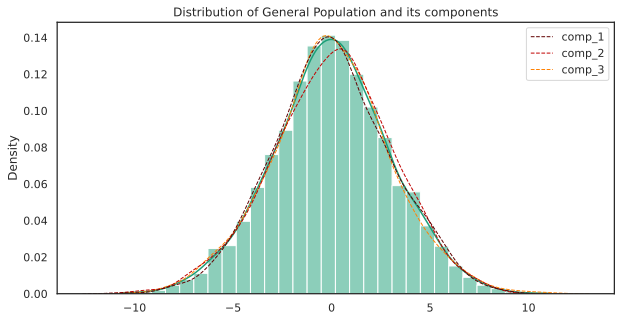

In [ ]:
visualisation.distribution('eq_mean_eq_std')

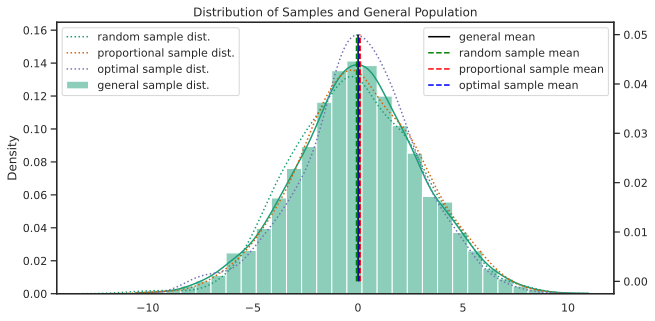

In [ ]:
# Add real mean vert line
# Add intervals for mean
visualisation.compare_dist('eq_mean_eq_std')

Boxplots for sample mean:

Random_subsampling. 2000 exp. Sample mean std: 0.136
Proportional_subsampling. 2000 exp. Sample mean std: 0.138
Optimal_subsampling. 2000 exp. Sample mean std: 0.136


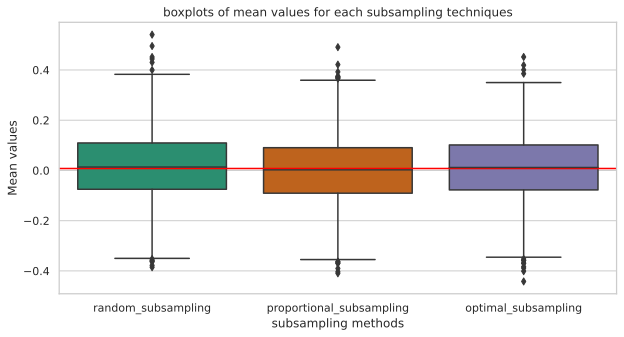

In [ ]:
visualisation.boxplot('eq_mean_eq_std')

**Conclusion**  
it seems like all methods perform exactly the same.

---

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

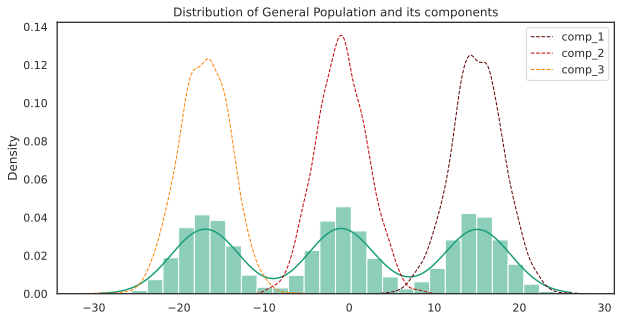

In [ ]:
visualisation.distribution('dif_mean_eq_std')

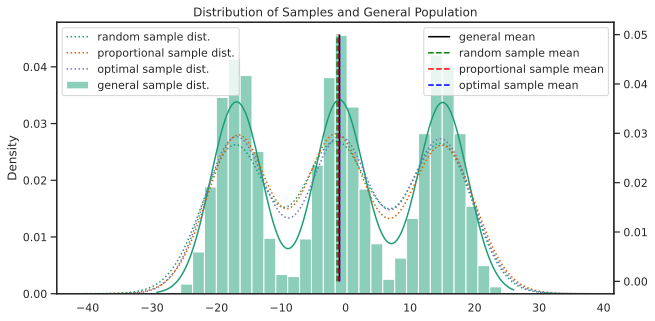

In [ ]:
# Add real mean vert line
# Add intervals for mean
visualisation.compare_dist('dif_mean_eq_std')

Boxplots for sample mean:

Random_subsampling. 2000 exp. Sample mean std: 0.601
Proportional_subsampling. 2000 exp. Sample mean std: 0.134
Optimal_subsampling. 2000 exp. Sample mean std: 0.132


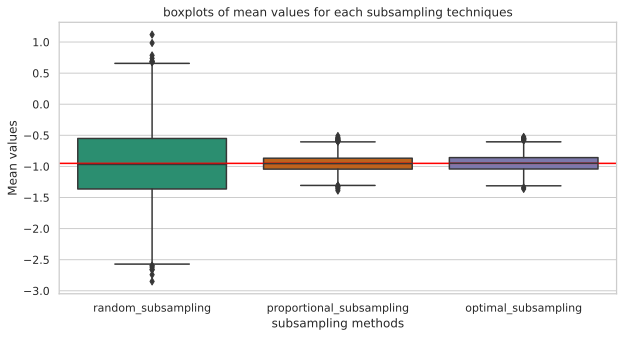

In [ ]:
visualisation.boxplot('dif_mean_eq_std')

**Conclusion**  
As we see random sampling isn't a good way for this situation. The optimal subsampling method and the proportional sampling is working the same way because of equal stds.

___

**General population with EQUAL means and DIFFERENT STDs of strata**  
Distribution histogram:

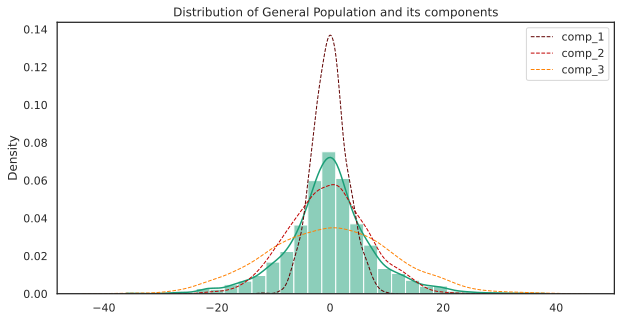

In [ ]:
visualisation.distribution('eq_mean_dif_std')

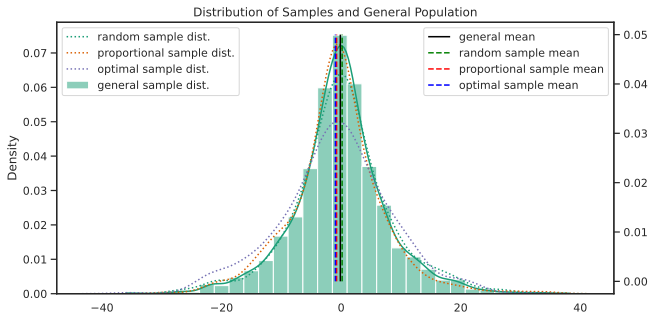

In [ ]:
# Add real mean vert line
# Add intervals for mean
visualisation.compare_dist('eq_mean_dif_std')

Boxplots for sample mean:

Random_subsampling. 2000 exp. Sample mean std: 0.347
Proportional_subsampling. 2000 exp. Sample mean std: 0.354
Optimal_subsampling. 2000 exp. Sample mean std: 0.314


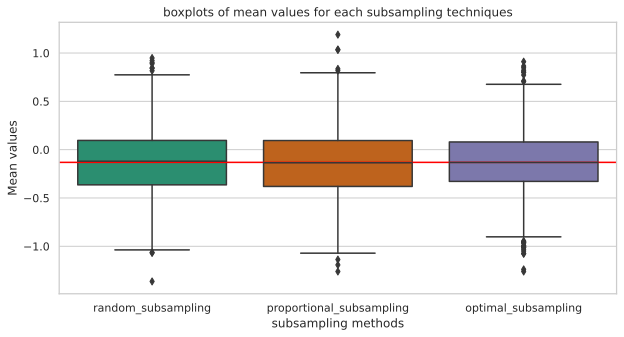

In [ ]:
visualisation.boxplot('eq_mean_dif_std')

**Conclusion**  
All methods perform a similar way. But optimal subsampling is working a little bit better.

---

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

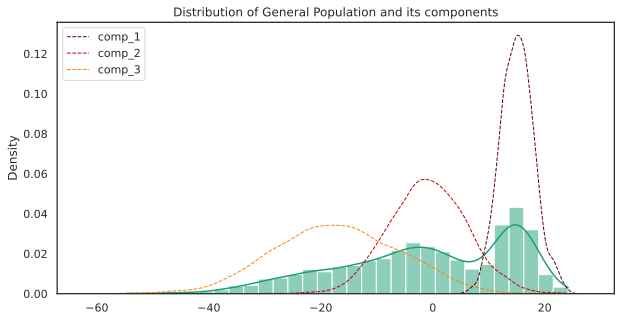

In [ ]:
visualisation.distribution('dif_mean_dif_std')

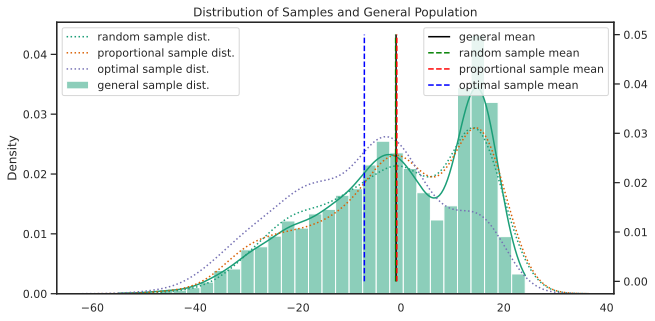

In [ ]:
# Add real mean vert line
# Add intervals for mean
visualisation.compare_dist('dif_mean_dif_std')

Boxplots for sample mean:

Random_subsampling. 2000 exp. Sample mean std: 0.681
Proportional_subsampling. 2000 exp. Sample mean std: 0.351
Optimal_subsampling. 2000 exp. Sample mean std: 0.312


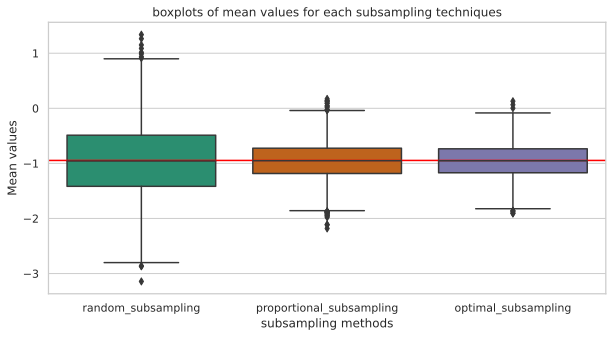

In [ ]:
visualisation.boxplot('dif_mean_dif_std')

With the experiments conducted and statistics estimated we can generate these <b>conclusions</b>: 

1. So no matter what type of sampling we use, the expectation of sample average will be equal to the General Population mean.

2. But, as we can see, there are some significant differences in the variance of the sample means. In the first case, when we generate the General population with EQUAL means and EQUAL STDs of strata, there is no method to prefer. A similar situation is observed in the case when we generate a General population with EQUAL means and DIFFERENT STDs of strata. Although the optimal sub-sampling method is working better.  
But if we will speak about other options of generating a general sample the optimal sub-sampling method is the most stable variant. Proportional sampling is slightly worse. Random sampling is the worst case.

# Task 2

### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.

In [ ]:
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain']) 

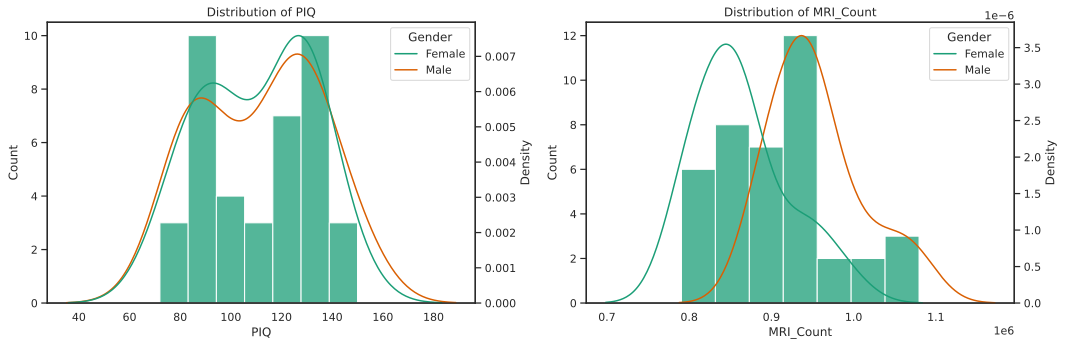

In [ ]:
sns.set(style="white", palette="Dark2")
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(x="PIQ", data=brain_data.loc[:, ["PIQ", "Gender"]], kde=False, ax=axes[0])
axes[0].set_title("Distribution of PIQ")
sns.histplot(x="MRI_Count", data=brain_data.loc[:, ["MRI_Count", "Gender"]], kde=False, ax=axes[1])
axes[1].set_title("Distribution of MRI_Count")
ax_1 = axes[0].twinx()
sns.kdeplot(x="PIQ", data=brain_data.loc[:, ["PIQ", "Gender"]], hue="Gender", ax=ax_1)
ax_2 = axes[1].twinx()
sns.kdeplot(x="MRI_Count", data=brain_data.loc[:, ["MRI_Count", "Gender"]], hue="Gender", ax=ax_2)
plt.tight_layout()
plt.show()

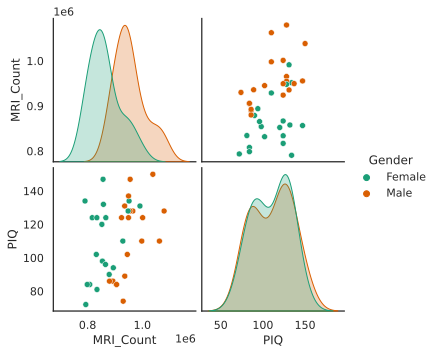

In [ ]:
sns.pairplot(data=brain_data.loc[:, ["MRI_Count", "Gender", "PIQ"]], hue="Gender")
plt.show()

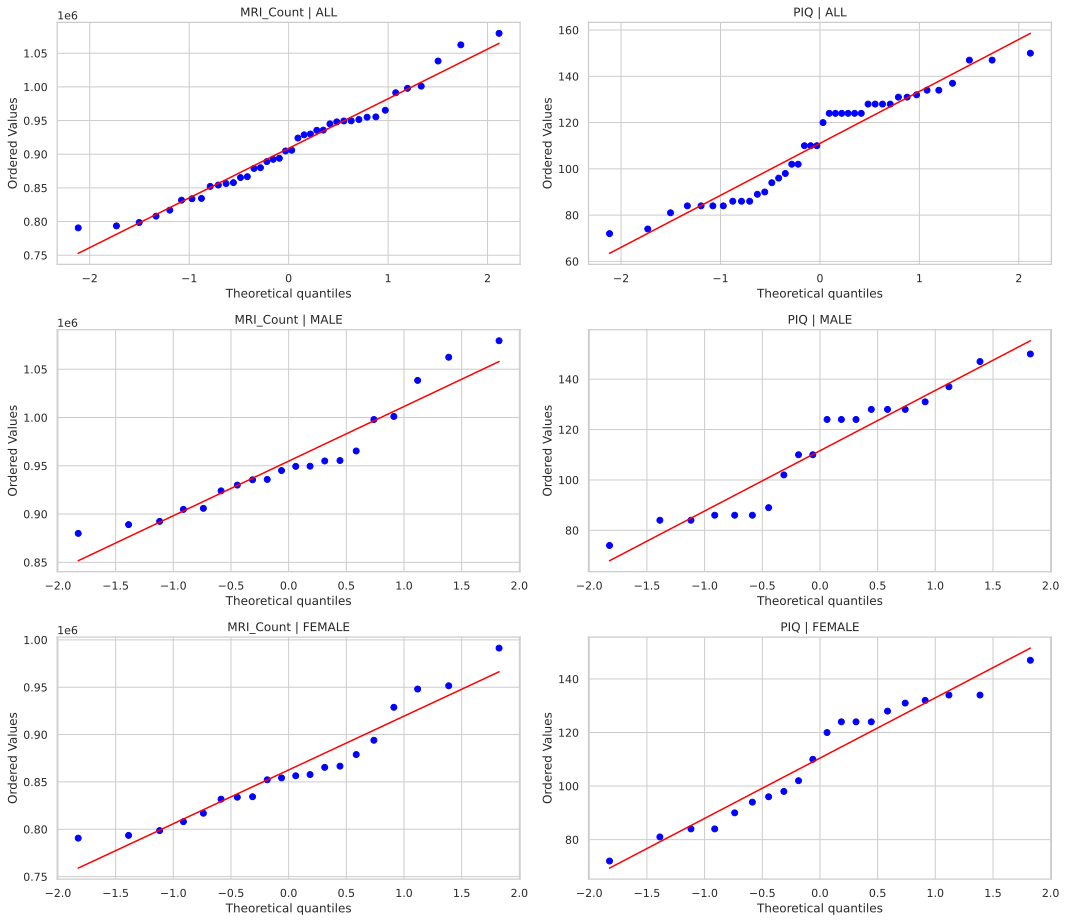

In [ ]:
# Checking normality assumption
fig, axes = plt.subplots(3,2, figsize=(15,13))
st.probplot(brain_data.loc[:, "MRI_Count"], dist="norm", plot=axes[0][0])
st.probplot(brain_data.loc[:, "PIQ"], dist="norm", plot=axes[0][1])

st.probplot(brain_data.loc[brain_data["Gender"]=="Male", "MRI_Count"], dist="norm", plot=axes[1][0])
st.probplot(brain_data.loc[brain_data["Gender"]=="Male", "PIQ"], dist="norm", plot=axes[1][1])

st.probplot(brain_data.loc[brain_data["Gender"]=="Female", "MRI_Count"], dist="norm", plot=axes[2][0])
st.probplot(brain_data.loc[brain_data["Gender"]=="Female", "PIQ"], dist="norm", plot=axes[2][1])

axes[0][0].set_title("MRI_Count | ALL")
axes[0][1].set_title("PIQ | ALL")
axes[1][0].set_title("MRI_Count | MALE")
axes[1][1].set_title("PIQ | MALE")
axes[2][0].set_title("MRI_Count | FEMALE")
axes[2][1].set_title("PIQ | FEMALE")

plt.tight_layout()
plt.show()

In [ ]:
container = [brain_data.loc[:, "MRI_Count"], brain_data.loc[:, "PIQ"], 
             brain_data.loc[brain_data["Gender"]=="Male", "PIQ"],
             brain_data.loc[brain_data["Gender"]=="Female", "PIQ"],
             brain_data.loc[brain_data["Gender"]=="Female", "MRI_Count"], 
             brain_data.loc[brain_data["Gender"]=="Male", "MRI_Count"]] 

for data in container:
    # print(f"kolmogorov-smirnov test : {st.kstest(data.values, 'norm')}")
    print(f"shapiro test : {st.shapiro(data.values)}")

shapiro test : (0.9712710976600647, 0.3945104777812958)
shapiro test : (0.9278563261032104, 0.013718176633119583)
shapiro test : (0.9154750108718872, 0.08110667765140533)
shapiro test : (0.9362022876739502, 0.2030726671218872)
shapiro test : (0.9701089262962341, 0.757173478603363)
shapiro test : (0.9600252509117126, 0.5443532466888428)


As we see, distributions are not perfect, but I think we can roughly claim, that the normality assumption is satisfied

In [ ]:
# checking the correlation between MRI_Count and PIQ for the entire sample
print("Pearson corr. coef.:{0[0]:.03}, p-value: {0[1]:.03}".format(st.pearsonr(brain_data.loc[:, "MRI_Count"], 
                                                                               brain_data.loc[:, "PIQ"])))
print("Spearman corr. coef.:{0[0]:.03}, p-value: {0[1]:.03}".format(st.spearmanr(brain_data.loc[:, "MRI_Count"],
                                                                                 brain_data.loc[:, "PIQ"])))

Pearson corr. coef.:0.387, p-value: 0.0137
Spearman corr. coef.:0.412, p-value: 0.00817


In these results, the Pearson correlation between MRI_Count and PIQ is about 0.38, p_value=0.01, which indicates that there is a moderate positive relationship between the variables.

In [ ]:
# checking the correlation between MRI_Count and PIQ for Male subsample
print("Pearson corr. coef.:{0[0]:.03}, p-value: {0[1]:.03}".format(st.pearsonr(brain_data.loc[brain_data["Gender"]=="Male", "MRI_Count"], 
                                                                               brain_data.loc[brain_data["Gender"]=="Male", "PIQ"])))
print("Spearman corr. coef.:{0[0]:.03}, p-value: {0[1]:.03}".format(st.spearmanr(brain_data.loc[brain_data["Gender"]=="Male", "MRI_Count"], 
                                                                                 brain_data.loc[brain_data["Gender"]=="Male", "PIQ"])))

Pearson corr. coef.:0.568, p-value: 0.00895
Spearman corr. coef.:0.659, p-value: 0.00157


In these results, the Pearson correlation between MRI_Count and PIQ in **MALE** subsample is about 0.57, p_value=0.008, which indicates that there is a moderate positive relationship between the variables.

In [ ]:
# checking the correlation between MRI_Count and PIQ for Female subsample
print("Pearson corr. coef.:{0[0]:.03}, p-value: {0[1]:.03}".format(st.pearsonr(brain_data.loc[brain_data["Gender"]=="Female", "MRI_Count"],
                                                                               brain_data.loc[brain_data["Gender"]=="Female", "PIQ"])))
print("Spearman corr. coef.:{0[0]:.03}, p-value: {0[1]:.03}".format(st.spearmanr(brain_data.loc[brain_data["Gender"]=="Female", "MRI_Count"], 
                                                                                 brain_data.loc[brain_data["Gender"]=="Female", "PIQ"])))

Pearson corr. coef.:0.396, p-value: 0.0838
Spearman corr. coef.:0.338, p-value: 0.145


In these results, the Pearson correlation between MRI_Count and PIQ in **FEMALE** subsample is about 0.4, p_value=0.08. There is not enough evidence at the 0.05 level to conclude that there is a linear relationship in the population between the MRI_Count and PIQ in **FEMALE** subsample.


### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)


In [ ]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
        Giving a value between 0 and +1 
    """
    chi2, pvalue = st.chi2_contingency(confusion_matrix)[:2]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    result = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    print(f"Cramers V: {round(result, 3)}, p-value: {pvalue:0.03}")
    return result, pvalue

In [ ]:
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2
cars_prefes_data = cars_prefes_data.loc[:, ["Sex", "PreferCar"]]
confusion_matrix = pd.crosstab(cars_prefes_data.loc[:, "Sex"], cars_prefes_data.loc[:, "PreferCar"])

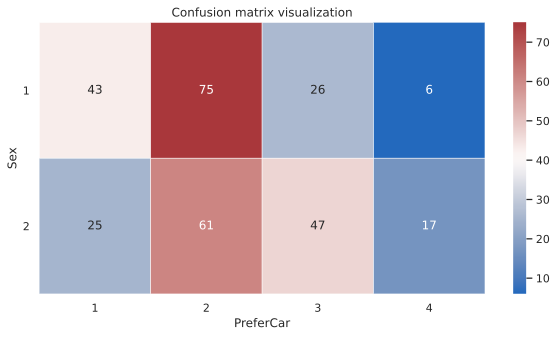

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix, vmin=confusion_matrix.min().min(), 
            vmax=confusion_matrix.max().max(), linewidths=0.5, 
            cmap = 'vlag', annot=True, )
plt.yticks(rotation = 0)
plt.title("Confusion matrix visualization")
plt.show()

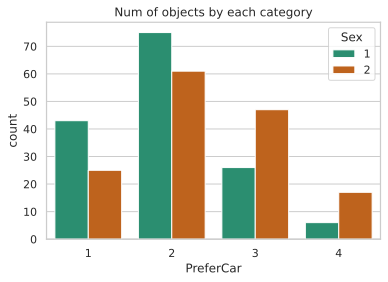

In [ ]:
sns.countplot(data=cars_prefes_data, x="PreferCar", hue="Sex")
plt.title("Num of objects by each category")
plt.show()

In [ ]:
result, pvalue = cramers_corrected_stat(confusion_matrix)

Cramers V: 0.22, p-value: 0.000556


There is sufficient evidence at the 0.05 level to conclude that there is a difference between men's and women's choice of auto.

# Task 3

## Part 1
1) For any country (you are free to choose any of the presented) 
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

In [ ]:
data = pd.read_csv("./master.csv")
japan = data.loc[data["country"]=='Japan', :].copy()

### Visualization

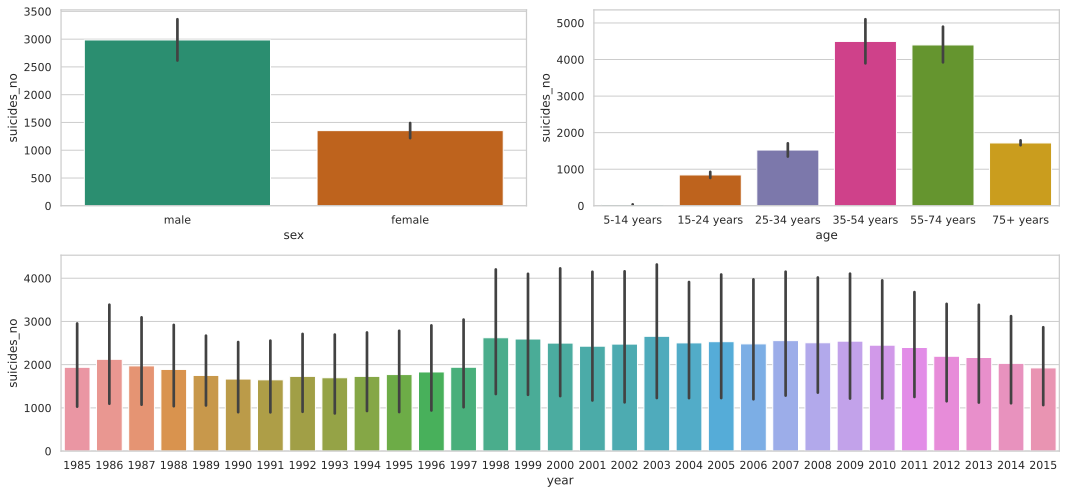

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,7))
gs = fig.add_gridspec(3, 3)

sns.barplot(y="suicides_no", x="sex", data=japan, ax=axes[0][0])
sns.barplot(y="suicides_no", x="age", data=japan, ax=axes[0][1], 
            order=['5-14 years', '15-24 years', '25-34 years', 
                   '35-54 years','55-74 years', '75+ years'])

gs = axes[1, -1].get_gridspec()
for ax in axes[1:, :][0]:
    ax.remove()
huge_ax = fig.add_subplot(gs[1:, :])
sns.barplot(y="suicides_no", x="year", data=japan, ax=huge_ax)

plt.tight_layout()
plt.show()

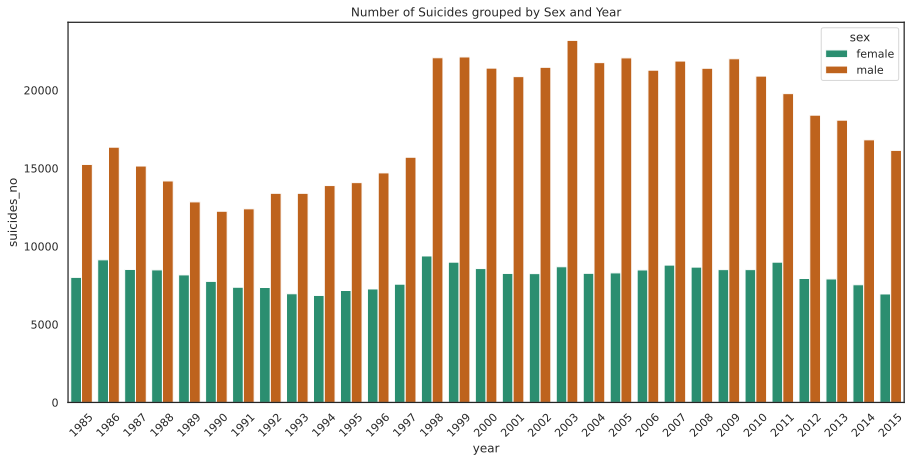

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Number of Suicides grouped by Sex and Year")
sns.barplot(x="year", y="suicides_no", data=japan.groupby(by=["sex", "year"]).sum().reset_index(), hue="sex")
plt.xticks(rotation=45)
plt.show()

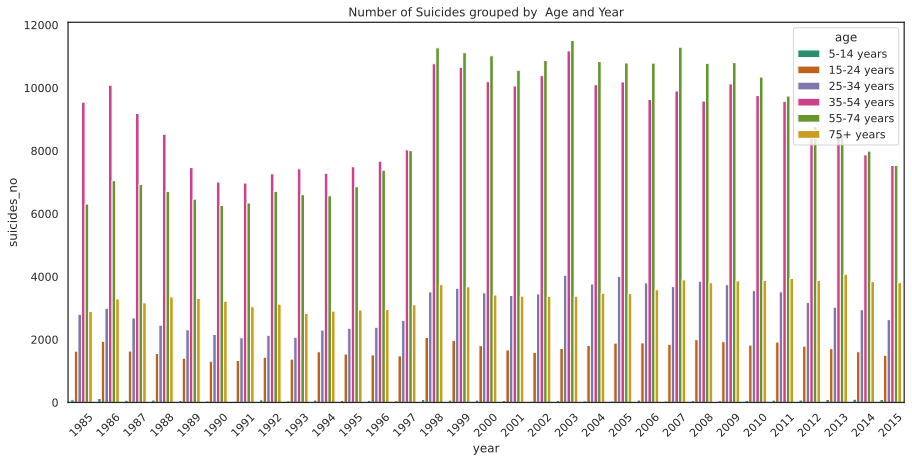

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Number of Suicides grouped by  Age and Year")
sns.barplot(x="year", y="suicides_no", data=japan.groupby(by=["age", "year"]).sum().reset_index(), hue="age",
             hue_order=['5-14 years', '15-24 years', '25-34 years', '35-54 years','55-74 years', '75+ years'])
plt.xticks(rotation=45)
plt.show()

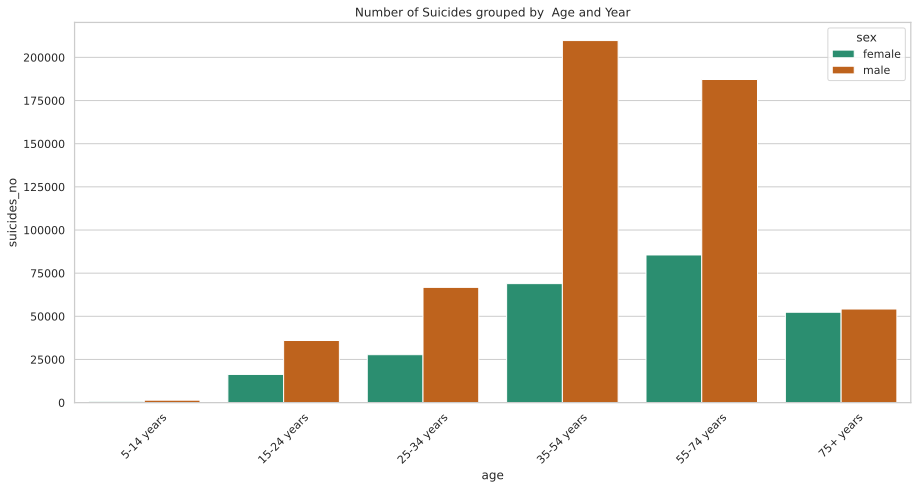

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Number of Suicides grouped by  Age and Year")
sns.barplot(x="age", y="suicides_no", data=japan.groupby(by=["age", "sex"]).sum().reset_index(), hue="sex",
             order=['5-14 years', '15-24 years', '25-34 years', '35-54 years','55-74 years', '75+ years'])
plt.xticks(rotation=45)
plt.show()

### Hypothesis testing

In [ ]:
sample_1 = japan.loc[japan["sex"]=="male", "suicides_no"]
sample_2 = japan.loc[japan["sex"]=="female", "suicides_no"]

print(f"std of 1st sample: {sample_1.std():.05}") 
print(f"std of 2d sample: {sample_2.std():.04}")
print("They are not equal!")

std of 1st sample: 2676.1
std of 2d sample: 974.4
They are not equal!


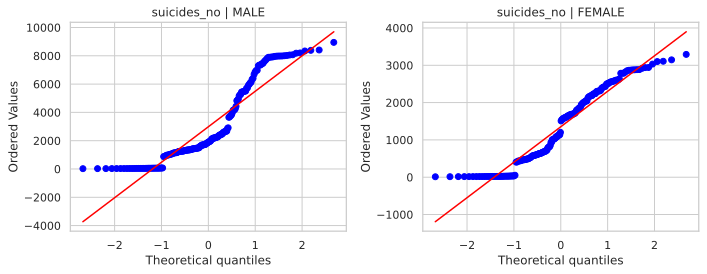


The skewness of sample_1: 0.815
The kurtosis of sample_1: -0.709 

The skewness of sample_1: 0.147
The kurtosis of sample_1: -1.29 



In [ ]:
# Checking normality assumption
fig, axes = plt.subplots(1,2, figsize=(10,4))
st.probplot(sample_1, dist="norm", plot=axes[0])
st.probplot(sample_2, dist="norm", plot=axes[1])
axes[0].set_title("suicides_no | MALE")
axes[1].set_title("suicides_no | FEMALE")
plt.tight_layout()
plt.show()

print(f"\nThe skewness of sample_1: {sample_1.skew():.03}")
print(f"The kurtosis of sample_1: {sample_1.kurtosis():.03} \n")
print(f"The skewness of sample_1: {sample_2.skew():.03}")
print(f"The kurtosis of sample_1: {sample_2.kurtosis():.03} \n")

So, we can assume that using a t-test is not really a great idea. Maybe it is meaningful to perform the Mann-Whitney U rank test.

In [ ]:
st.ttest_ind(sample_1, sample_2, equal_var=False)

Ttest_indResult(statistic=7.817419587808839, pvalue=1.8461138435175266e-13)

In [ ]:
st.mannwhitneyu(sample_1, sample_2)

MannwhitneyuResult(statistic=11680.5, pvalue=3.036639908689867e-08)

**Welch's t-test results:**
    
There is sufficient evidence at the level 0.05 to conclude that there is a difference in average suicide numbers between male and female groups.

**Mann-Whitney U rank test:**
    
There is sufficient evidence at the level 0.05 to conclude that there is a difference in median suicide numbers between male and female groups.

So we claim that men die from suicide more often than women. We can't claim that people of certain sex are more prone to suicides. Probably men are just more effective at suicide.

## Part 2
For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

We need to perform ANOVA analysis to solve this task.

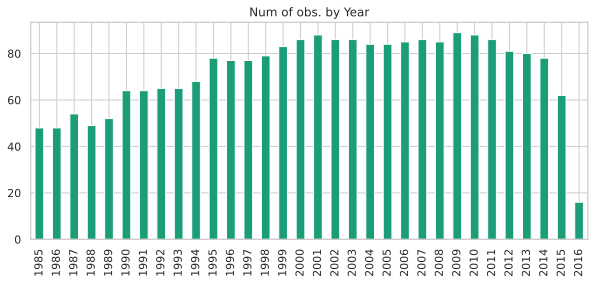

In [ ]:
# There are only 16 observations in 2016
data.groupby(["year", "country"]).mean().reset_index()["year"].value_counts().sort_index().plot.bar(figsize=(10,4))
plt.title("Num of obs. by Year")
plt.show()

In [ ]:
new_data = data.loc[data["year"]==2016, ["suicides/100k pop", "gdp_per_capita ($)", "country"]].groupby("country").mean()
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
suicides/100k pop,16.0,13.421188,9.248639,0.0,6.97775,13.273,18.352,36.172
gdp_per_capita ($),16.0,25665.125000,21871.974670,3788.0,10432.50000,14595.000,47259.000,64708.000


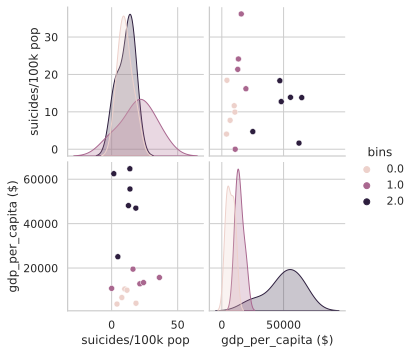

In [ ]:
# let's divide our data into 3 groups by "gdp_per_capita ($)" feature using KBinsDiscretizer with quantile strategy
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
new_data.loc[:, "bins"] = discretizer.fit_transform(new_data.loc[:, ["gdp_per_capita ($)"]])
sns.pairplot(new_data, hue="bins")
plt.show()

sample_1 = new_data.loc[new_data["bins"]==0, "suicides/100k pop"]
sample_2 = new_data.loc[new_data["bins"]==1, "suicides/100k pop"]
sample_3 = new_data.loc[new_data["bins"]==2, "suicides/100k pop"]

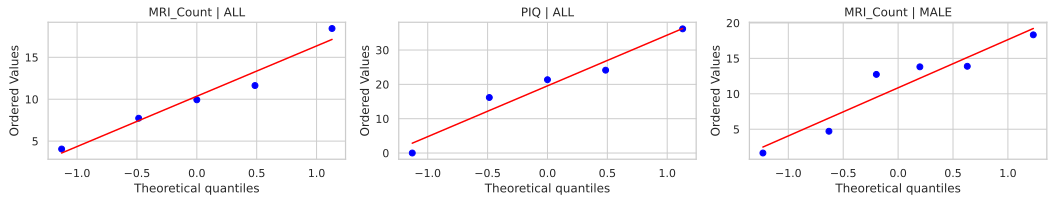


It seems like each sample is from a normally distributed population.

let's test homoscedasticity assumption
std of 1st sample: 5.332
std of 2d sample: 13.17
std of 3d sample: 6.321
They are not equal!


In [ ]:
# Checking normality assumption
fig, axes = plt.subplots(1,3, figsize=(15,3))

st.probplot(sample_1, dist="norm", plot=axes[0])
st.probplot(sample_2, dist="norm", plot=axes[1])
st.probplot(sample_3, dist="norm", plot=axes[2])

axes[0].set_title("MRI_Count | ALL")
axes[1].set_title("PIQ | ALL")
axes[2].set_title("MRI_Count | MALE")

plt.tight_layout()
plt.show()

# print(f"shapiro test : {st.shapiro(sample_1)}")
# print(f"shapiro test : {st.shapiro(sample_2)}")
# print(f"shapiro test : {st.shapiro(sample_3)}")

print("\nIt seems like each sample is from a normally distributed population.")

print("\nlet's test homoscedasticity assumption")
print(f"std of 1st sample: {sample_1.std():.05}") 
print(f"std of 2d sample: {sample_2.std():.04}")
print(f"std of 3d sample: {sample_3.std():.04}")
print("They are not equal!")

In [ ]:
# The result of ANOVA with broken assumptions
st.f_oneway(sample_1, sample_2, sample_3, )

F_onewayResult(statistic=1.7766318121396871, pvalue=0.20791613078915513)

There is not enough evidence at the level 0.05 to conclude that there is a difference in average suicides/100k pop between groups.

In [ ]:
# The result of non-parametric The Kruskal-Wallis H-test
st.kruskal(sample_1, sample_2, sample_3)

KruskalResult(statistic=2.757352941176471, pvalue=0.2519117451202076)

There is not enough evidence at the level 0.05 to conclude that there is a difference in median suicides/100k pop between groups.